- OpenClassrooms Project 7, Data Scientist
- Author : Oumeima EL GHARBI
- Date : November and December 2022, January and February 2023

### Importing libraries

In [ ]:
%reset -f

import warnings
warnings.filterwarnings(action="ignore")

# to compute time of pipeline
from time import time, strftime, gmtime

import pandas as pd
from os import listdir
from os.path import isfile, join

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from feature_engineering import *

import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from evaluation_metrics import *

%matplotlib inline
%autosave 300

In [2]:
import sys
print("Python version {}.{}.{}".format(str(sys.version_info[0]), str(sys.version_info[1]), str(sys.version_info[2])))

Python version 3.10.9


In [3]:
# Create local directories to save data
os.makedirs("dataset/cleaned", exist_ok=True)

In [37]:
global seed
seed = 42

In [2]:
# Starting time
t0 = time()

input_path = "dataset/cleaned/"
output_path = "dataset/cleaned/"

## Part I : Preparing vectors
Feature engineering
Train / validation split

#### 1) Feature engineering

**The feature engineering is done by running the script feature_engineering.py, this notebook's purpose is to make a train and validation set and train models**

It takes around 5 minutes to generate the preprocessed training dataset. The cell below is deactivated since the file is saved locally.

import subprocess

print("__Generate train set__")
subprocess.call(r'python feature_engineering.py', shell=True)

After running the script **feature_engineering.py**, we create a train and validation set.

In [5]:
data = pd.read_csv(input_path + "data_train_preprocessed_vf.csv", index_col="SK_ID_CURR")
print(data.shape)

(307507, 778)


In [6]:
data[data.TARGET.isna()]

,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,CC_NAME_CONTRACT_STATUS_Sent proposal_MAX,CC_NAME_CONTRACT_STATUS_Sent proposal_MEAN,CC_NAME_CONTRACT_STATUS_Sent proposal_SUM,CC_NAME_CONTRACT_STATUS_Sent proposal_VAR,CC_NAME_CONTRACT_STATUS_Signed_MIN,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_COUNT
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,


In [7]:
data.isna().sum(axis=0)

TARGET                                      0
CODE_GENDER                                 0
FLAG_OWN_CAR                                0
FLAG_OWN_REALTY                             0
CNT_CHILDREN                                0
                                        ...  
CC_NAME_CONTRACT_STATUS_Signed_MAX     220602
CC_NAME_CONTRACT_STATUS_Signed_MEAN    220602
CC_NAME_CONTRACT_STATUS_Signed_SUM     220602
CC_NAME_CONTRACT_STATUS_Signed_VAR     221234
CC_COUNT                               220602
Length: 778, dtype: int64

#### 2) Train / validation split

In [8]:
# We create a training set and a test set (the test set contains 30% of the dataset)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
train, val = train_test_split(data, test_size=0.3, random_state=seed)

In [10]:
#data.select_dtypes('object') # we don't have 'object' here but it is just in case.

In [9]:
categorical_columns = data.select_dtypes('object').columns
numerical_columns = data.select_dtypes(include='number').columns
#numerical_columns = X.select_dtypes(include='number').columns

print("Shape of categorical variables : ", categorical_columns.shape)
print("Shape of numerical variables :", numerical_columns.shape)

Shape of categorical variables :  (0,)
Shape of numerical variables : (778,)


In [14]:
# Saving dataset
train.to_csv("{}{}".format(output_path, "train.csv"), encoding='utf-8', index_label="SK_ID_CURR")
val.to_csv("{}{}".format(output_path, "val.csv"), encoding='utf-8', index_label="SK_ID_CURR")

## Part II : Prediction

#### Loading dataset

In [29]:
data = pd.read_csv(input_path + "data_train_preprocessed_vf.csv", index_col="SK_ID_CURR")
print(data.shape)

train_file = input_path + "train.csv"
val_file = input_path + "val.csv"

train = pd.read_csv(train_file, sep=",", index_col="SK_ID_CURR")
val = pd.read_csv(val_file, sep=",", index_col="SK_ID_CURR")

print(train.shape)
print(val.shape)

target = "TARGET"
# all rows, not target and removes SK_ID_CURR the PK
features = [f for f in data.columns if f not in ['TARGET','SK_ID_CURR']] # ,'SK_ID_BUREAU','SK_ID_PREV','index' / deleted

(307507, 778)
(215254, 778)
(92253, 778)


##### Separating X and y vectors

In [30]:
X = data[features]
y = data[target]

In [33]:
print("The shape of the X matrix :", X.shape, "and this is the shape of the target vector :", y.shape)

The shape of the X matrix : (307507, 777) and this is the shape of the target vector : (307507,)


##### Preparing X_train, X_val, y_train and y_val

In [31]:
#X_train = train.loc[:, train.columns != 'TARGET'].iloc[:, 1:]
#X_val = val.loc[:, val.columns != 'TARGET'].iloc[:, 1:] # all rows, not target and removes SK_ID_CURR the PK

# all rows, not target and removes SK_ID_CURR the PK
X_train = train[features]
X_val = val[features]

y_train = train[target]
y_val = val[target]

In [32]:
print("The shape of the training matrix :", X_train.shape, "and this is the shape of the target vector :", y_train.shape)
print("The shape of the test matrix :", X_val.shape, "and this is the shape of the target vector :", y_val.shape)

The shape of the training matrix : (215254, 777) and this is the shape of the target vector : (215254,)
The shape of the test matrix : (92253, 777) and this is the shape of the target vector : (92253,)


### 1) Preparing GridSearch and SMOTE

In [8]:
from model_train_functions import *

### 2) Training models

#### Baseline : DummyClassifier

Fitting classifier on X_train and y_train
Saving model with joblib
Predicting
Evaluating
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84811
           1       0.00      0.00      0.00      7442

    accuracy                           0.92     92253
   macro avg       0.46      0.50      0.48     92253
weighted avg       0.85      0.92      0.88     92253

ROC-AUC 0.5


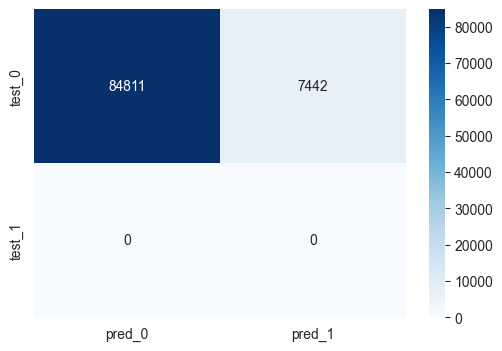

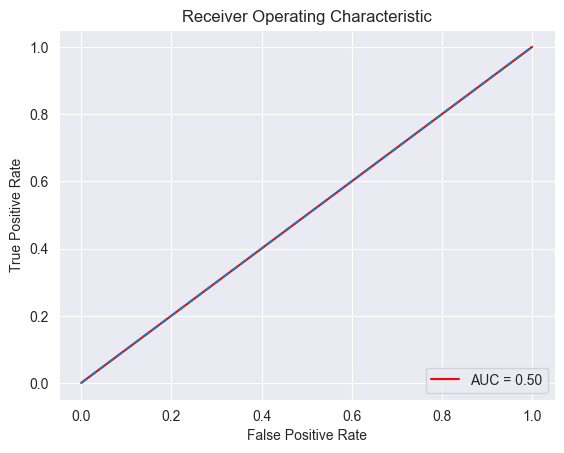

Updating the results dataframe
Prediction for :  TARGET


,___Model___,__ROC-AUC__,__F-score Beta = 10__,__Recall__,Precision,F1-score,F1-score weighted,Accuracy
0,Dummy,0.5,0.0,0.0,0.0,0.0,0.881,0.919
0,Dummy,0.5,0.0,0.0,0.0,0.0,0.881,0.919


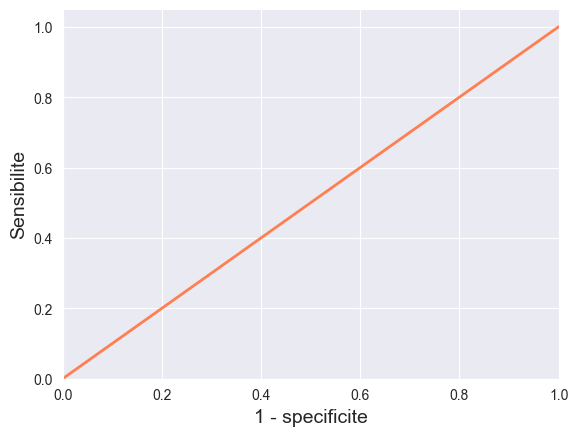

In [39]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")

print("Fitting classifier on X_train and y_train")
dummy_clf.fit(X_train, y_train)

# save the model to disk
print("Saving model with joblib")
filename_joblib = 'models/{}.joblib'.format("Dummy")
joblib.dump(dummy_clf, filename_joblib)

print("Predicting")
y_pred = dummy_clf.predict(X_val)

print("Evaluating")
evaluate_classification(y_val, y_pred, y_pred_proba=y_pred)

print("Updating the results dataframe")
results = evaluate_models("Dummy", results, y_val, y_pred)

#### LightGBM

##### 1) Training using Cross-Validation with 10 stratified folds

**For the lightGBM model, we used another training method in the script train_models.py, the running time to train 10 LightGBM model is more than 3 hours, thus here, we load these trained models and evaluate them just like the others above.**

Since it takes around 3 hours to generate the 10 LightGBM models, the cell below is deactivated since the models are saved locally.


import subprocess

print("__Generate LGBM models using Cross-Validation__")
subprocess.call(r'python train_models.py', shell=True)

Loading LGBM
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     84811
           1       0.83      0.10      0.17      7442

    accuracy                           0.93     92253
   macro avg       0.88      0.55      0.57     92253
weighted avg       0.92      0.93      0.90     92253

ROC-AUC 0.548


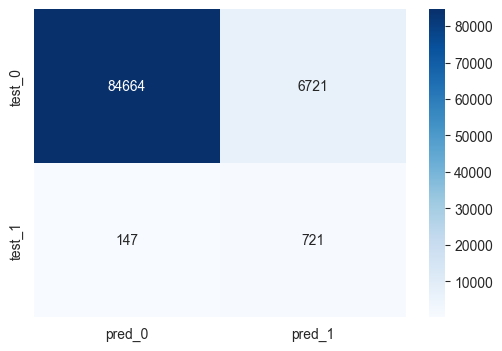

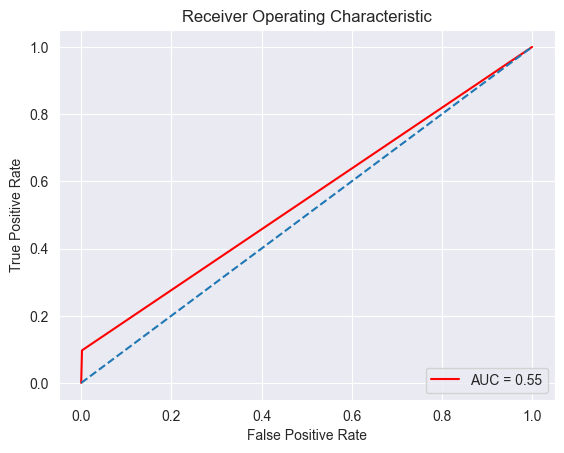

Prediction for :  TARGET


,___Model___,__ROC-AUC__,__F-score Beta = 10__,__Recall__,Precision,F1-score,F1-score weighted,Accuracy
0,LightGBM_0,0.548,0.098,0.097,0.831,0.174,0.897,0.926
0,Dummy,0.500,0.000,0.000,0.000,0.000,0.881,0.919
0,Dummy,0.500,0.000,0.000,0.000,0.000,0.881,0.919


Loading LGBM


KeyboardInterrupt: 

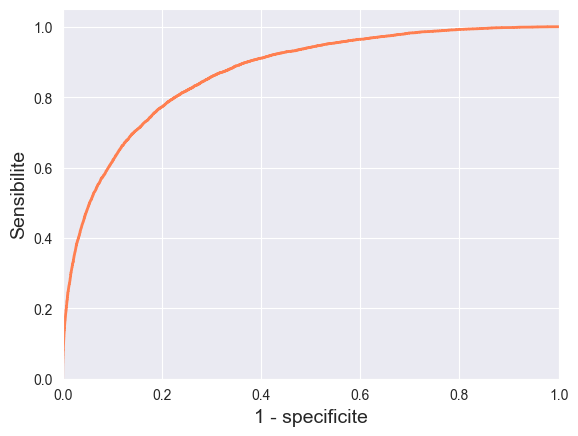

In [40]:
for i in range(10):
    # load model
    print("Loading LGBM")
    clf = joblib.load('models/LGBM/LGBMClassifier_fold_{}.joblib'.format(i))

    y_pred = clf.predict(X_val)
    y_pred_proba = clf.predict_proba(X_val)[:, 1] # we take the prediction for the class 1
    evaluate_classification(y_val, y_pred, y_pred_proba=y_pred_proba)
    results = evaluate_models("LightGBM_{}".format(i), results, y_val, y_pred)

##### 2) Training using GridSearch and Cross-Validation

##### 3) Training using GrisSearchCV and SMOTE

import lightgbm as lgb
import re

# LightGBM parameters found by Bayesian optimization
clf = lgb.LGBMClassifier(
    nthread=4,
    n_estimators=10000,
    learning_rate=0.02,
    num_leaves=34,
    colsample_bytree=0.9497036,
    subsample=0.8715623,
    max_depth=8,
    reg_alpha=0.041545473,
    reg_lambda=0.0735294,
    min_split_gain=0.0222415,
    min_child_weight=39.3259775,
    silent=-1,
    verbose=-1, )

X_train = X_train.rename(columns=lambda x: re.sub('[^A-Za-z0-9_]+', '', x))
X_val = X_val.rename(columns=lambda x: re.sub('[^A-Za-z0-9_]+', '', x))
# train_y = train_y.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

print("Training LGBM")
clf.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_val, y_val)],
        eval_metric='auc', verbose=200, early_stopping_rounds=200)

# save the model to disk
print("Saving LGBM with joblib")
filename_joblib = 'models/LGBMClassifier.joblib'
joblib.dump(clf, filename_joblib)


# load model
print("Loading LGBM")
clf = joblib.load('models/LGBMClassifier.joblib')

y_pred = clf.predict(X_val)
y_pred_proba = clf.predict_proba(X_val)[:, 1] # we take the prediction for the class 1
evaluate_classification(y_val, y_pred, y_pred_proba=y_pred_proba)
results = evaluate_models("LightGBM", results, y_val, y_pred)

#### XGBoost

##### 1) Using GridSearchCV

In [ ]:
params = {
    'gamma': [0.5, 2, 5],
    'scale_pos_weight': [8, 9, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'max_depth': [3, 4, 5],
}


In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

score, params = make_grisearch(xgb, X, y, param_grid=params)
print(score, params)

In [ ]:
xgb = XGBClassifier(colsample_bytree =1.0, gamma= 0.5, max_depth= 4, scale_pos_weight= 10, subsample= 1.0)
score, mc = evaluate(xgb,
                     'xgb',
                     X,
                     y,
                     k_fold=5,
                     beta=2,
                     show_confusion_matrice=True,
                     apply_smote=False,
                     smote_params=None)
print(score)

##### 2) Using GridSearchCV and SMOTE

In [ ]:
xgb = XGBClassifier(colsample_bytree =1.0, gamma= 0.5, max_depth= 4, scale_pos_weight= 10, subsample= 1.0)
score, mc = evaluate(xgb,
                     'xgb',
                     X,
                     y,
                     k_fold=5,
                     beta=2,
                     show_confusion_matrice=True,
                     apply_smote=True,
                     smote_params={'k_neighbors':100, 'sampling_strategy':1})
print(score)

#### Random Forest

##### 1) GridSearchCV

In [ ]:
rf = RandomForestClassifier(class_weight='balanced')
scores, cm = evaluate(rf, 'random_forest_base', X, y, k_fold=5, beta=2, show_confusion_matrice=True)
display(scores)

##### 2) Using SMOTE

In [ ]:
rf = RandomForestClassifier(class_weight='balanced')
scores, cm = evaluate(rf,
                      'random_forest_smote',
                      X,
                      y,
                      k_fold=5,
                      beta=2,
                      show_confusion_matrice=True,
                      apply_smote=True,
                      smote_params={'k_neighbors':100, 'sampling_strategy':1})
display(scores)

### 3) Feature Importance

In [ ]:
import shap

In [ ]:
best_model = "models/LGBM/LGBMClassifier_fold_{}.joblib".format(7)

In [ ]:
all_clients_to_predict = pd.read_csv("dataset/cleaned/data_test_preprocessed_vf.csv", index_col="SK_ID_CURR")

#### 1) Model's feature importance

In [ ]:
columns = all_clients_to_predict.columns.tolist()
feature_importance_dict = get_feature_importance_model(best_model, columns)
plot_feature_importance(feature_importance_dict)

#### 2) SHAP feature importance

In [ ]:
explainer = shap.Explainer(best_model, all_clients_to_predict)

sample_clients = all_clients_to_predict.sample(1000)
shap_values = explainer.shap_values(sample_clients)

In [ ]:
shap.summary_plot(shap_values, sample_clients, plot_type="bar")

In [ ]:
print("When predicting 0")
shap.summary_plot(shap_values[0], sample_clients)

In [ ]:
print("When predicting 1")
shap.summary_plot(shap_values[1], sample_clients, plot_type="layered_violin", color='coolwarm')

In [ ]:
print("For the most importance feature")
shap.dependence_plot("EXT_SOURCE_3", shap_values[0], sample_clients)

In [ ]:
# End of notebook time
t1 = time()
print("computing time : {:8.6f} sec".format(t1 - t0))
print("computing time : " + strftime('%H:%M:%S', gmtime(t1 - t0)))